<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/Ch20_Keras_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
digit = load_digits()
print('\n'.join(digit['DESCR'].split('\n')[:19]))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.


In [2]:
digit['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

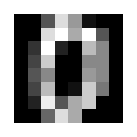

In [3]:
plt.figure(figsize=(1,1))
plt.imshow(digit['data'][0].reshape(8, 8), cmap='gray')
plt.axis('off');

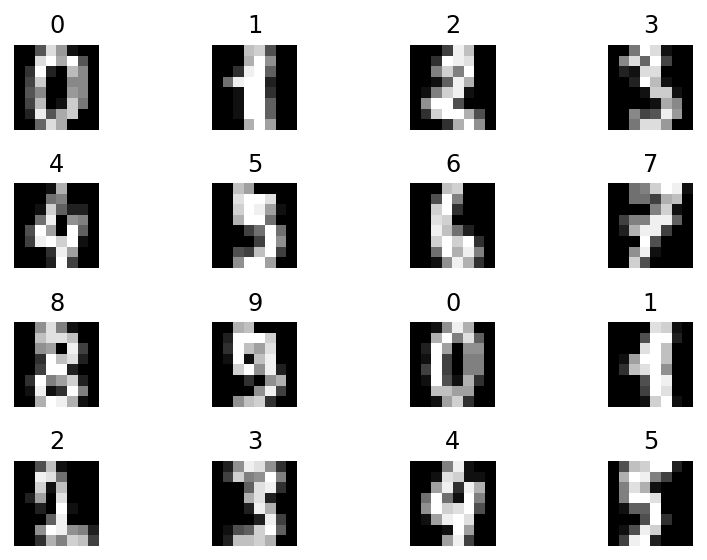

In [4]:
# ch20-4
fig, axes = plt.subplots(4,4, figsize=(6,4))
for i, ax in enumerate(axes.flatten()):
    img = digit['data'][i].reshape(8, 8)
    ax.imshow(img, cmap='gray')
    ax.set_title(digit['target'][i])
    ax.axis('off')
plt.tight_layout()

In [5]:
print('資料總筆數為：', np.size(digit['target']))
print('資料目標值的個數：', np.bincount(digit['target']))

資料總筆數為： 1797
資料目標值的個數： [178 182 177 183 181 182 181 179 174 180]


In [6]:
X = digit['data']
y = digit['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [7]:
# ch20-7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
model_pl_kn = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
model_pl_kn.fit(X_train, y_train)
y_pred = model_pl_kn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

正確率： 0.993
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]


In [8]:
# ch20-8
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
# ch20-9
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
y_train_oh =  oh.fit_transform(y_train.reshape(-1,1))
y_test_oh = oh.transform(y_test.reshape(-1,1))
print('第一筆資料的目標值：', y_train[0])
print('獨熱編碼結果：')
print(pd.DataFrame(y_train_oh.toarray()[[0]]))

第一筆資料的目標值： 8
獨熱編碼結果：
     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0


In [10]:
# ch20-10
np.random.seed(42)
model.fit(X_train, y_train_oh.toarray(), 
          epochs=50, verbose=0, validation_split=0.2)

y_pred_oh = model.predict(X_test)
y_pred = y_pred_oh.argmax(axis = 1)

print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

正確率： 0.976
[[52  0  1  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  1  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0  1  1 57]]


In [11]:
# ch20-11
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_model():
    model = models.Sequential()
    model.add(Dense(512, activation='relu', input_shape=(64,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

np.random.seed(42)
model_deep = KerasClassifier(build_fn=build_model, epochs=50, verbose=0)
model_pl = make_pipeline(MinMaxScaler(), model_deep)
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

正確率： 0.98
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  1  0  1]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  2 57]]


In [12]:
# ch20-12
param_grid = {
    'kerasclassifier__epochs':[50, 100, 150],
    'kerasclassifier__validation_split':[0.1, 0.2]
}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model_pl, param_grid=param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print('最佳參數：',gs.best_params_)
y_pred = gs.best_estimator_.predict(X_test)
print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

最佳參數： {'kerasclassifier__epochs': 100, 'kerasclassifier__validation_split': 0.1}
正確率： 0.983
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  1  0  0  0 64  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  1 58]]


In [13]:
# ch20-13
def build_model(node_numbers=128):
    model = models.Sequential()
    model.add(Dense(node_numbers, activation='relu', input_shape=(64,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

model_deep = KerasClassifier(build_fn=build_model, epochs=10, verbose=0)
model_pl = make_pipeline(MinMaxScaler(), model_deep)

param_grid = {
    'kerasclassifier__node_numbers':[64, 128, 512],
}

gs = GridSearchCV(model_pl, param_grid=param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
gs.fit(X_train, y_train)

print('最佳參數：',gs.best_params_)
y_pred = gs.best_estimator_.predict(X_test)
print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

最佳參數： {'kerasclassifier__node_numbers': 512}
正確率： 0.969
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  1  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


In [14]:
# ch20-14
def build_model(hidden_layers=1):
    model = models.Sequential()
    model.add(Dense(128, activation='relu', input_shape=(64,)))
    for i in range(hidden_layers):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_deep = KerasClassifier(build_fn=build_model, epochs=50, verbose=0)
model_pl = make_pipeline(MinMaxScaler(), model_deep)

param_grid = {
    'kerasclassifier__hidden_layers':range(1,5),
}
gs = GridSearchCV(model_pl, param_grid=param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print('最佳參數：',gs.best_params_)
y_pred = gs.best_estimator_.predict(X_test)
print('正確率：',accuracy_score(y_test, y_pred).round(3))
print(confusion_matrix(y_test, y_pred))

最佳參數： {'kerasclassifier__hidden_layers': 3}
正確率： 0.974
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  1  1  0  0 61  1  1  0  1]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  2  0  0  0  1  1 55]]
